In [1]:


import pandas as pd



In [2]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import seaborn as sns
#sns.set_style("white")
sns.set_style("darkgrid")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sns.set_context("poster", font_scale = 0.75, rc={"grid.linewidth": 5})

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Delete the sentences in the beginning and the sentence in the end prior to loading the .txt file

In [9]:
df30 = pd.read_csv('2019_9_1_20.1.9.txt',sep='\t')

In [10]:
df= df30.drop(['StDev','0;1','1;1','1;0','0;0']

 , axis =1 )

In [11]:
df

,Well,Mean
0,A1,5236
1,A2,5714
2,A3,4095
3,A4,5125
4,A5,5098
5,A6,4734
6,A7,4904
7,A8,4870
8,A9,4946
9,A10,4980


In [12]:
df.set_index("Well", inplace = True) 

In [13]:
print(df)

      Mean
Well      
A1    5236
A2    5714
A3    4095
A4    5125
A5    5098
A6    4734
A7    4904
A8    4870
A9    4946
A10   4980
A11   4502
A12   4483
B1    5065
B2    5548
B3    5675
B4    5134
B5    5098
B6    5156
B7    5521
B8    5100
B9    4930
B10   4801
B11   4628
B12   4776
C1    5355
C2    6940
C3    5231
C4    5140
C5    5225
C6    5520
...    ...
F7    5096
F8     164
F9     164
F10    103
F11    121
F12    120
G1    1974
G2    4645
G3    5845
G4    7019
G5     147
G6     137
G7     143
G8     117
G9     119
G10    132
G11    176
G12    164
H1     134
H2     167
H3     175
H4     175
H5     184
H6     159
H7     193
H8     124
H9    1507
H10   4879
H11   6087
H12   6679

[96 rows x 1 columns]


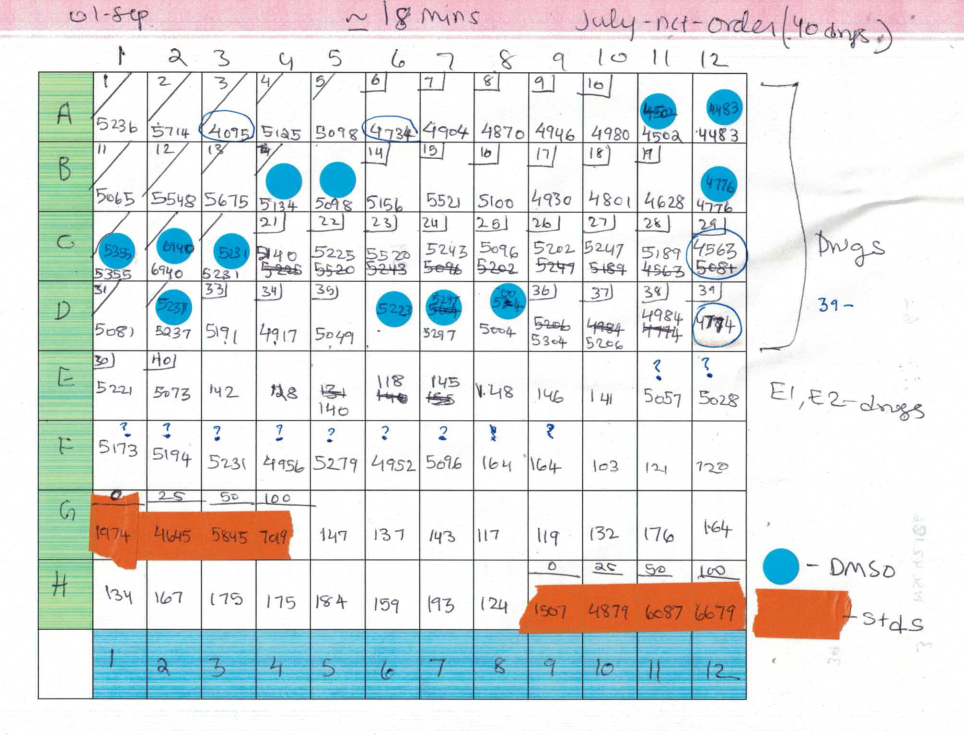

In [26]:
dmso_wells = [ 'A11', 'B4','B12','B5','C1','C2','C3','D2','D6','D7','D8']
#DMSO = df.loc[dmso_wells]
cpds = ['A1','A2','A3','A4','A5','A6','A7','A8', 'A9','B1','B2','B3','B6','B7','B8','B9','B10','B11','C4','C5','C6','C7','C8','C9','C10','C11','C12','D1','D3','D4','D5','D9','D10','D11','D12'
]
zero_stds =['G1','H9']
soln_ids = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,31,33,34,36,37,38,39,30,40]



In [27]:
DMSO = df.loc[dmso_wells]
Cpds_screened = df.loc [cpds]
Zero = df.loc[zero_stds]

,Mean
Well,
G1,1974
H9,1507


In [29]:
DMSO_array = DMSO.to_numpy()
Cpds_screened_array = Cpds_screened.to_numpy()
Zero_array = Zero.to_numpy()

In [30]:
print("DMSO_array : ", DMSO_array)  
print("mean of DMSO wells : ", np.mean(DMSO_array)) 

DMSO_array :  [[4502]
 [5134]
 [4776]
 [5098]
 [5355]
 [6940]
 [5231]
 [5237]
 [5223]
 [5297]
 [5004]]
mean of DMSO wells :  5254.272727272727


In [31]:
print("Zero_array : ", Zero_array)  
print("AVG Background: ", np.mean(Zero_array)) 

Zero_array :  [[1974]
 [1507]]
AVG Background:  1740.5


In [38]:
AVG_Background = 1740.5
mean_of_DMSO_wells = 5254.273
Denominator = AVG_Background-mean_of_DMSO_wells


In [35]:
step_1 = np.subtract(5254.273,Cpds_screened_array)

In [46]:
step_2 = np.divide(step_1, Denominator) 

In [51]:
percent_inhibition = np.multiply(step_2,100)

In [59]:
results_1 = pd.DataFrame(percent_inhibition)

In [60]:
results_1.insert(0, "well_ids", cpds, True)

In [61]:
results_1.columns = ['well_id','%_inhibition']

In [62]:
results_1

,well_id,%_inhibition
0,A1,-0.520039
1,A2,13.083571
2,A3,-32.992256
3,A4,-3.679037
4,A5,-4.447442
5,A6,-14.806676
6,A7,-9.968572
7,A8,-10.936193
8,A9,-8.773276
9,B1,-5.386603


In [52]:
ranked_list =

TypeError: '<' not supported between instances of 'float' and 'str'

# final results step

SO this is the code to generate the rows. The individual wells need to be in CAPS and within ''. 

In [ ]:
std1 = df.loc[ [0,1,2,3,4,5,6,7]]

In [ ]:
std1.insert(0, "std", [0,1,5,10,25,50,75,100], True)

In [ ]:
std2 = df.loc[ [12,13,14,15,16,17,18,19]]

In [ ]:
std2.insert(0, "std", [0,1,5,10,25,50,75,100], True)

In [ ]:
enz1= df.loc[ [8,9,10,11]]

In [ ]:
enz2 = df.loc[ [20,21,22,23]]

In [ ]:
enz3 = df.loc[ [32,33,34,35]]

In [ ]:
enz4 = df.loc[ [44,45,46,47]]

In [ ]:
###### dataframe to numpy

In [43]:
x = df.to_numpy()

In [44]:
x

array([[1131],
       [1195],
       [1115],
       [1201],
       [1132],
       [ 488],
       [ 498],
       [1050],
       [1016],
       [ 997],
       [ 941],
       [ 950],
       [1227],
       [1634],
       [1736],
       [1459],
       [ 748],
       [1050],
       [ 930],
       [ 850],
       [1183],
       [ 963],
       [ 955],
       [1190],
       [1171],
       [1264],
       [1395],
       [1090],
       [1135],
       [1218],
       [1030],
       [1392],
       [1235],
       [1113],
       [1174],
       [1430],
       [1676],
       [1413],
       [1439],
       [1244],
       [1145],
       [1203],
       [ 765],
       [1205],
       [1595],
       [1258],
       [1145],
       [1300],
       [1462],
       [1945],
       [1822],
       [ 479],
       [ 433],
       [  81],
       [1405],
       [1411],
       [1585],
       [ 100],
       [  49],
       [  21],
       [ 227],
       [ 193],
       [1756],
       [2228],
       [2171],
       [  29],
       [  

# standard curve

choose the row or column as per the layout of the wells. 

## merging the standards

### Merge two dataframes with both the left and right dataframes using the std


In [ ]:
std_curve = pd.merge(std1, std2, left_on='std', right_on='std')

In [ ]:
std_curve


# importing copy module 
import copy 
  
# initializing list 1  
li1 = [1, 2, [3,5], 4] 
  
  
# using copy for shallow copy   
li2 = copy.copy(li1)  
  
# using deepcopy for deepcopy   
li3 = copy.deepcopy(li1)  
In the above code, the copy() returns a shallow copy of list and deepcopy() return a deep copy of list.

Deep copy
Deep
Deep copy is a process in which the copying process occurs recursively. It means first constructing a new collection object and then recursively populating it with copies of the child objects found in the original. In case of deep copy, a copy of object is copied in other object. It means that any changes made to a copy of object do not reflect in the original object. In python, this is implemented using “deepcopy()” function.

In [ ]:
import copy 

In [ ]:
std_curve_1 = copy.deepcopy(std_curve)

In [ ]:
std_curve_2 = std_curve_1.loc[ : ,['Mean_x','Mean_y']]

In [ ]:
std_curve_2.dtypes

In [ ]:
avg_std = std_curve_2.mean(axis=1)

In [ ]:
avg_std

In [ ]:
std_curve.insert(0, "mean", [929.5,775.5,1034.5,2025.0,4703.0,7094.5,7245.0,6395.0], True)

In [ ]:
#std_curve['mean'] = col.mean(axis=1)

In [ ]:
std_curve

In [ ]:
std_curve_mean= std_curve.drop(['Well_x','Well_y',] , axis =1)

In [ ]:
std_curve_mean.set_index("std", inplace=True)

In [ ]:
std_curve_mean['avg'] = std_curve_mean.mean(axis=1)

In [ ]:
sns.set(style="whitegrid")
sns.lineplot(data= std_curve_mean, palette="tab10", linewidth=2.5)
plt.title(" line graph std curve") 

In [ ]:
std_curve_mean.insert(0, "std", [0,1,5,10,25,50,75,100], True)

In [ ]:
sns.regplot(x='std', y='Mean_x', data=std_curve_mean)
sns.regplot(x='std', y='Mean_y', data=std_curve_mean)
plt.title("linear regression std curve ") 

In [ ]:
std_curve_mean

Our next step is to divide the data into “attributes” and “labels”.

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp (y) depending upon the MinTemp (X) recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [ ]:
X = std_curve_mean['avg'].values.reshape(-1,1)
y = std_curve_mean['std'].values.reshape(-1,1)

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [ ]:
#std_curve_mean.dtypes

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('02 may std curve  (Linear Regression)')
plt.xlabel('avg_flouresence')
plt.ylabel('standard
           
           ')
plt.show()


To retrieve the intercept:



In [ ]:
print(lin_reg.intercept_)  

In [ ]:
For retrieving the slope (coefficient of x):



In [ ]:
print(regressor.coef_)  

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

In [ ]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



## enzyme wells (7,8)

In [ ]:
enz1.insert(0, "enz", [1,2,3,4])

In [ ]:
enz2.insert(0, "enz", [1,2,3,4])

In [ ]:
col7

In [ ]:
enz1 = enz1.drop(['Well'] , axis =1)

In [ ]:
enz2 = enz2.drop(['Well'] , axis =1)

In [ ]:
enz_curve_RT = pd.merge(enz1,enz2, left_on='enz', right_on='enz')

In [ ]:
enz_curve_RT['avg'] = enz_curve_RT.mean(axis=1)
enz_curve_37['avg'] = enz_curve_37.mean(axis=1)

In [ ]:
enz3.insert(0, "enz", [1,2,3,4])

In [ ]:
enz4.insert(0, "enz", [1,2,3,4])

In [ ]:
enz_curve_37 = pd.merge(enz3,enz4, left_on='enz', right_on='enz')

In [ ]:
enz_curve_37.set_index("enz", inplace=True)

In [ ]:
enz_curve_37

In [ ]:
enz_curve_RT.set_index("enz", inplace=True)

In [ ]:
enz_curve_RT


In [ ]:
# intrepreting enz activity with linear regression
#lin_reg.predict (1639.0)
lin_reg.predict([[1639.0]])

In [ ]:
enz_curve_37

In [ ]:
# intrepreting enz activity with linear regression
#lin_reg.predict (1639.0)
lin_reg.predict([[1861.0]])